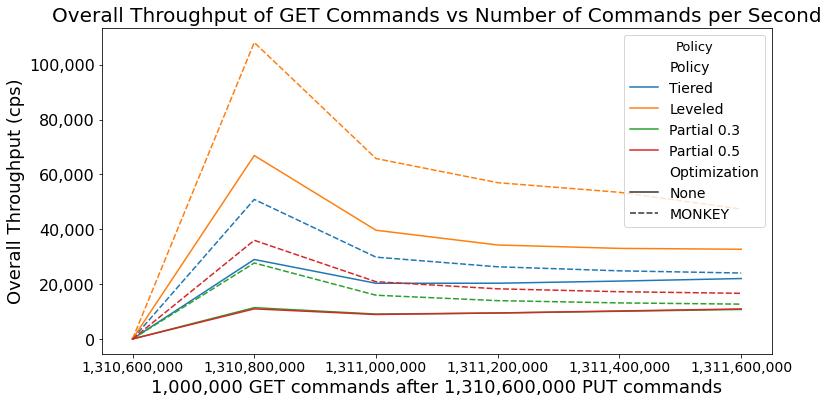

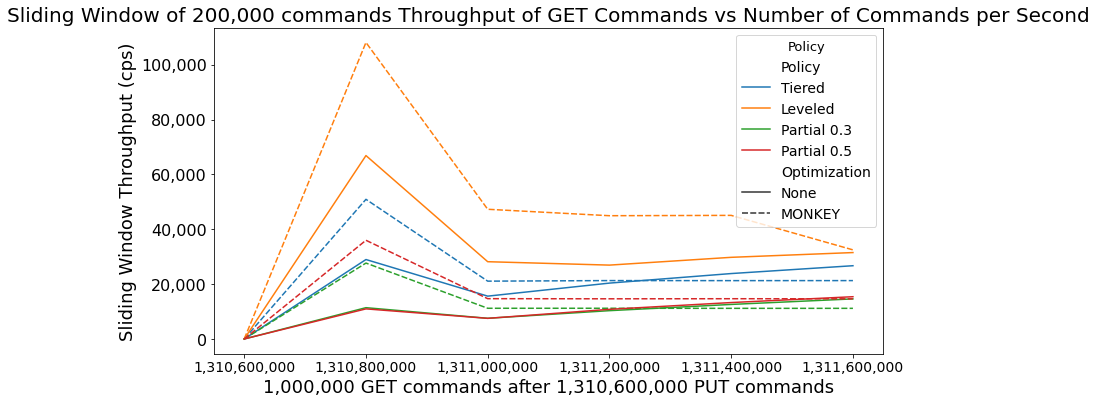

Text(0, 0.5, 'Page Faults')

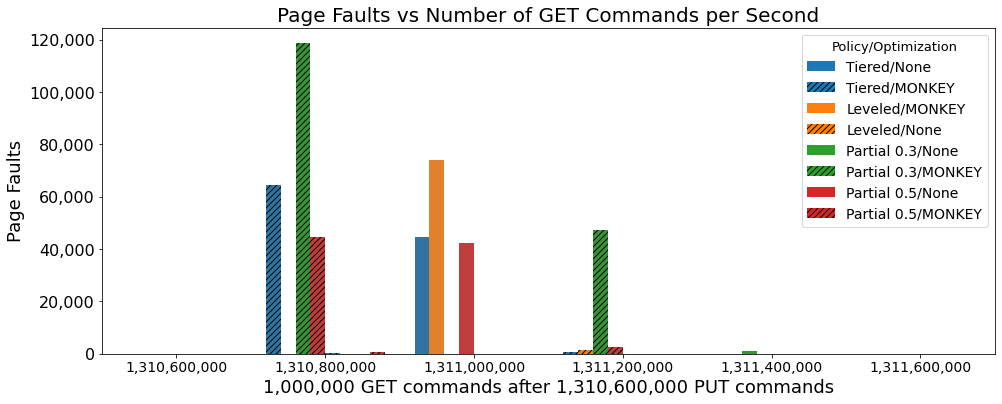

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('monkey_experiment.csv')
# sns.set(style="whitegrid")

def comma_format(x, pos):
    return '{:,}'.format(int(x))

# Create custom color palette
custom_palette = sns.color_palette("tab10", n_colors=len(df['Policy'].unique()))

# Plot 1
plt.figure(figsize=(12, 6))
plot1 = sns.lineplot(x='Total commands', y='Overall Throughput', hue='Policy', style='Optimization', data=df, palette=custom_palette)
plot1.set(title='Overall Throughput of GET Commands vs Number of Commands per Second', ylabel='Overall Throughput (cps)')
plot1.xaxis.set_major_formatter(FuncFormatter(comma_format))
plot1.yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(title='Policy', title_fontsize='13', loc='upper right')
plt.xlabel('1,000,000 GET commands after 1,310,600,000 PUT commands')
plt.show()

# Plot 2
plt.figure(figsize=(12, 6))
plot2 = sns.lineplot(x='Total commands', y='Sliding Window Throughput', hue='Policy', style='Optimization', data=df, palette=custom_palette)
plot2.set(title='Sliding Window of 200,000 commands Throughput of GET Commands vs Number of Commands per Second', ylabel='Sliding Window Throughput (cps)')
plot2.xaxis.set_major_formatter(FuncFormatter(comma_format))
plot2.yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(title='Policy', title_fontsize='13', loc='upper right')
plt.xlabel('1,000,000 GET commands after 1,310,600,000 PUT commands')
plt.show()

# Create 'Policy/Optimization' column
df['Policy/Optimization'] = df['Policy'] + '/' + df['Optimization']

# Create Plot 3
plt.figure(figsize=(16, 6))
plot3 = sns.barplot(x='Total commands', y='Faults Increase', hue='Policy/Optimization', data=df, palette=custom_palette)

# Apply hatch patterns based on 'Optimization'
hatches = ['', '////']
for i, bar in enumerate(plot3.patches):
    bar.set_hatch(hatches[i % len(hatches)])

plot3.set(title='Page Faults vs Number of GET Commands per Second')
plot3.yaxis.set_major_formatter(FuncFormatter(comma_format))

# Create a custom legend
legend_patches = []
for i, policy_opt in enumerate(df['Policy/Optimization'].unique()):
    color = custom_palette[i // len(hatches)]
    hatch = hatches[i % len(hatches)]
    legend_patches.append(plt.Rectangle((0, 0), 1, 1, fc=color, hatch=hatch))

plt.legend(handles=legend_patches, labels=list(df['Policy/Optimization'].unique()), title='Policy/Optimization', title_fontsize='13', loc='upper right')

# Update x-axis tick labels for Plot 3
unique_total_commands = df['Total commands'].unique()
x_labels = [f'{int(label):,}' for label in unique_total_commands]
plot3.set_xticklabels(x_labels)
plt.xlabel('1,000,000 GET commands after 1,310,600,000 PUT commands')
plt.ylabel('Page Faults')

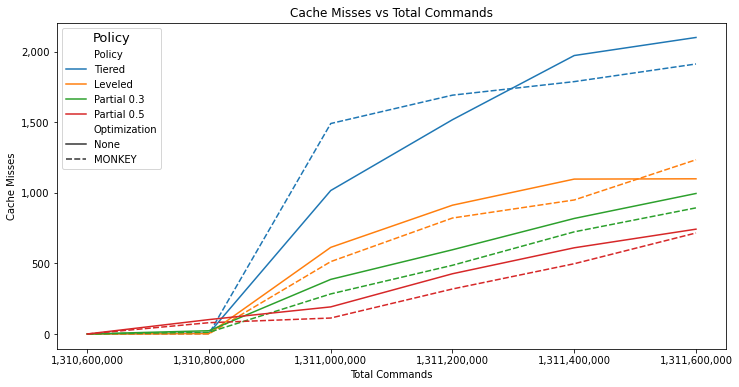

In [2]:
# Plot 4
plt.figure(figsize=(12, 6))
plot4 = sns.lineplot(x='Total commands', y='Cache Misses', hue='Policy', style='Optimization', data=df, palette=custom_palette)
plot4.set(title='Cache Misses vs Total Commands', xlabel='Total Commands', ylabel='Cache Misses')
plot4.xaxis.set_major_formatter(FuncFormatter(comma_format))
plot4.yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(title='Policy', title_fontsize='13', loc='upper left')
plt.show()

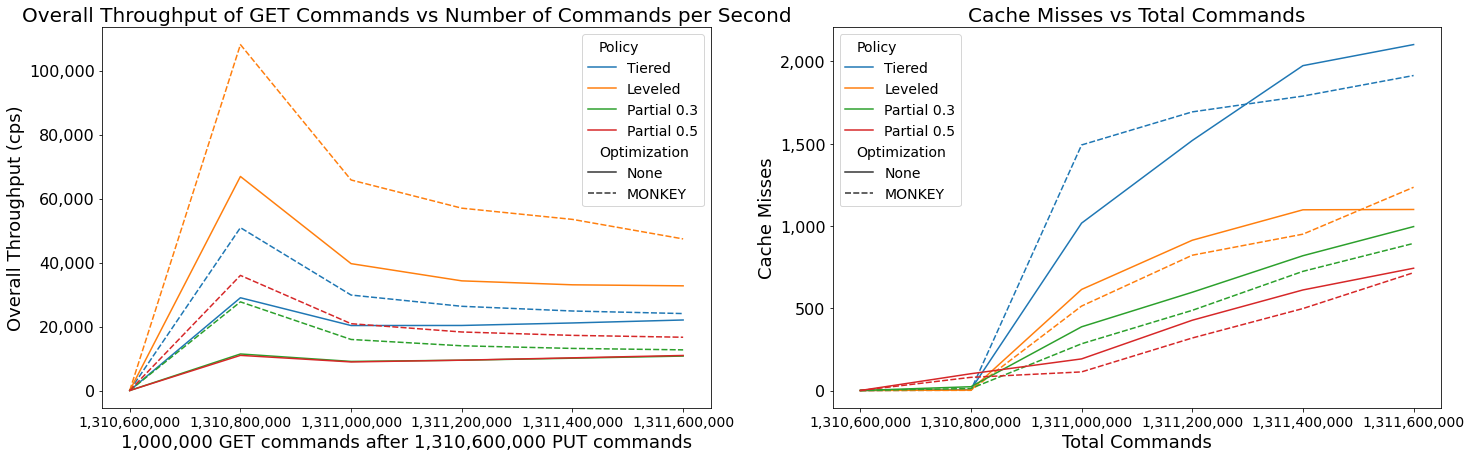

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv('monkey_experiment.csv')
# sns.set(style="whitegrid")

def comma_format(x, pos):
    return '{:,}'.format(int(x))

# Create custom color palette
custom_palette = sns.color_palette("tab10", n_colors=len(df['Policy'].unique()))

# Update font sizes
plt.rcParams.update({'font.size': 18, 'axes.labelsize': 18, 'xtick.labelsize': 14, 'ytick.labelsize': 16, 'axes.titlesize': 20, 'legend.fontsize': 14})

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 7))

# Plot 1
plot1 = sns.lineplot(ax=axes[0], x='Total commands', y='Overall Throughput', hue='Policy', style='Optimization', data=df, palette=custom_palette)
plot1.set(title='Overall Throughput of GET Commands vs Number of Commands per Second', ylabel='Overall Throughput (cps)')
plot1.xaxis.set_major_formatter(FuncFormatter(comma_format))
plot1.yaxis.set_major_formatter(FuncFormatter(comma_format))
# axes[0].legend(title='Policy', title_fontsize='14', loc='upper right')
axes[0].set_xlabel('1,000,000 GET commands after 1,310,600,000 PUT commands')

# Plot 4
plot4 = sns.lineplot(ax=axes[1], x='Total commands', y='Cache Misses', hue='Policy', style='Optimization', data=df, palette=custom_palette)
plot4.set(title='Cache Misses vs Total Commands', xlabel='Total Commands', ylabel='Cache Misses')
plot4.xaxis.set_major_formatter(FuncFormatter(comma_format))
plot4.yaxis.set_major_formatter(FuncFormatter(comma_format))
# axes[1].legend(title='Policy', title_fontsize='14', loc='upper left')

plt.show()
